In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import matplotlib.colors as colors
from scipy.interpolate import splrep, splev, UnivariateSpline
from skimage.transform import rescale

In [2]:
spectral_niches = pd.read_csv('./data/niche_energy.csv')

In [3]:
cdom_int = spectral_niches[spectral_niches.variable == 'violet_niche']['cdom']
# spline for violet niche
violet_spl = UnivariateSpline(cdom_int,
                              spectral_niches[spectral_niches.variable == 'violet_niche']['value'],
                              k=1, s=0)
# spline for violet-blue niche
violet_blue_spl = UnivariateSpline(cdom_int,
                                   spectral_niches[spectral_niches.variable == 'violet_blue_niche']['value'],
                                   k=1, s=0)
# spline for blue niche
blue_spl = UnivariateSpline(cdom_int,
                            spectral_niches[spectral_niches.variable == 'blue_niche']['value'],
                            k=1, s=0)
# spline for green niche
green_spl =  UnivariateSpline(cdom_int,
                              spectral_niches[spectral_niches.variable == 'green_niche']['value'],
                              k=1, s=0)
# spline for chromatic-acclimator niche
ca_spl = UnivariateSpline(cdom_int,
                          spectral_niches[spectral_niches.variable == 'ca_niche']['value'],
                          k=1, s=0)
# spline for orange niche
orange_spl = UnivariateSpline(cdom_int,
                              spectral_niches[spectral_niches.variable == 'orange_niche']['value'],
                              k=1, s=0)
# spline for red niche
red_spl = UnivariateSpline(cdom_int,
                           spectral_niches[spectral_niches.variable == 'red_niche']['value'],
                           k=1, s=0)

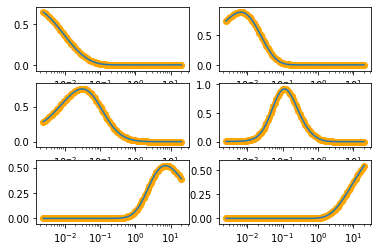

In [4]:
fig, ax = plt.subplots(3,2)
ax[0,0].plot(cdom_int, violet_spl(cdom_int))
ax[0,0].scatter(cdom_int, spectral_niches[spectral_niches.variable == 'violet_niche']['value'], color='orange')
ax[0,0].set_xscale('log')

ax[0,1].plot(cdom_int, violet_blue_spl(cdom_int))
ax[0,1].scatter(cdom_int, spectral_niches[spectral_niches.variable == 'violet_blue_niche']['value'], color='orange')
ax[0,1].set_xscale('log')

ax[1,0].plot(cdom_int, blue_spl(cdom_int))
ax[1,0].scatter(cdom_int, spectral_niches[spectral_niches.variable == 'blue_niche']['value'], color='orange')
ax[1,0].set_xscale('log')

ax[1,1].plot(cdom_int, ca_spl(cdom_int))
ax[1,1].scatter(cdom_int, spectral_niches[spectral_niches.variable == 'ca_niche']['value'], color='orange')
ax[1,1].set_xscale('log')

ax[2,0].plot(cdom_int, orange_spl(cdom_int))
ax[2,0].scatter(cdom_int, spectral_niches[spectral_niches.variable == 'orange_niche']['value'], color='orange')
ax[2,0].set_xscale('log')

ax[2,1].plot(cdom_int, red_spl(cdom_int))
ax[2,1].scatter(cdom_int, spectral_niches[spectral_niches.variable == 'red_niche']['value'], color='orange')
ax[2,1].set_xscale('log')

In [5]:
data = xr.open_dataset('./data/2016_04_01_adg_443.nc')

In [6]:
adg_443 = data.adg_443.isel(time=0)
adg_443_rescaled = rescale(adg_443.values, 0.25, anti_aliasing=False)
# rescale lat and lon
lat_rescaled = np.linspace(data.lat.min(), data.lat.max(), adg_443_rescaled.shape[0], endpoint=True)
lon_rescaled = np.linspace(data.lon.min(), data.lon.max(), adg_443_rescaled.shape[1], endpoint=True)

/Users/tadzio/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/Users/tadzio/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/tadzio/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


/Users/tadzio/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


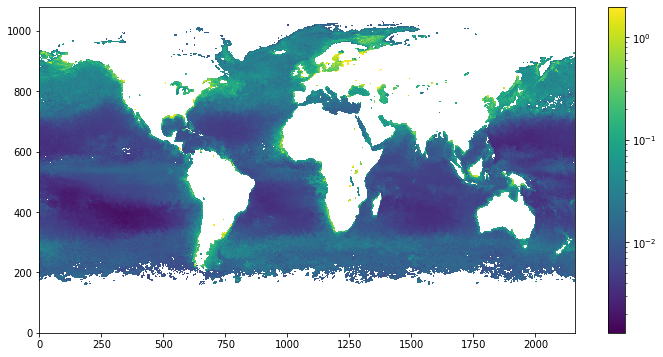

In [7]:
fig = plt.figure(figsize=(12,6))

adg_443_rescaled_map = plt.pcolormesh(np.flip(adg_443_rescaled, 0),
                                      norm=colors.LogNorm(vmin=np.nanmin(adg_443_rescaled), vmax=2))
# add colorbar
fig.colorbar(adg_443_rescaled_map)
plt.show()


In [8]:
violet_niche = np.vectorize(violet_spl)(adg_443_rescaled)
blue_niche = np.vectorize(blue_spl)(adg_443_rescaled)
green_niche = np.vectorize(green_spl)(adg_443_rescaled)

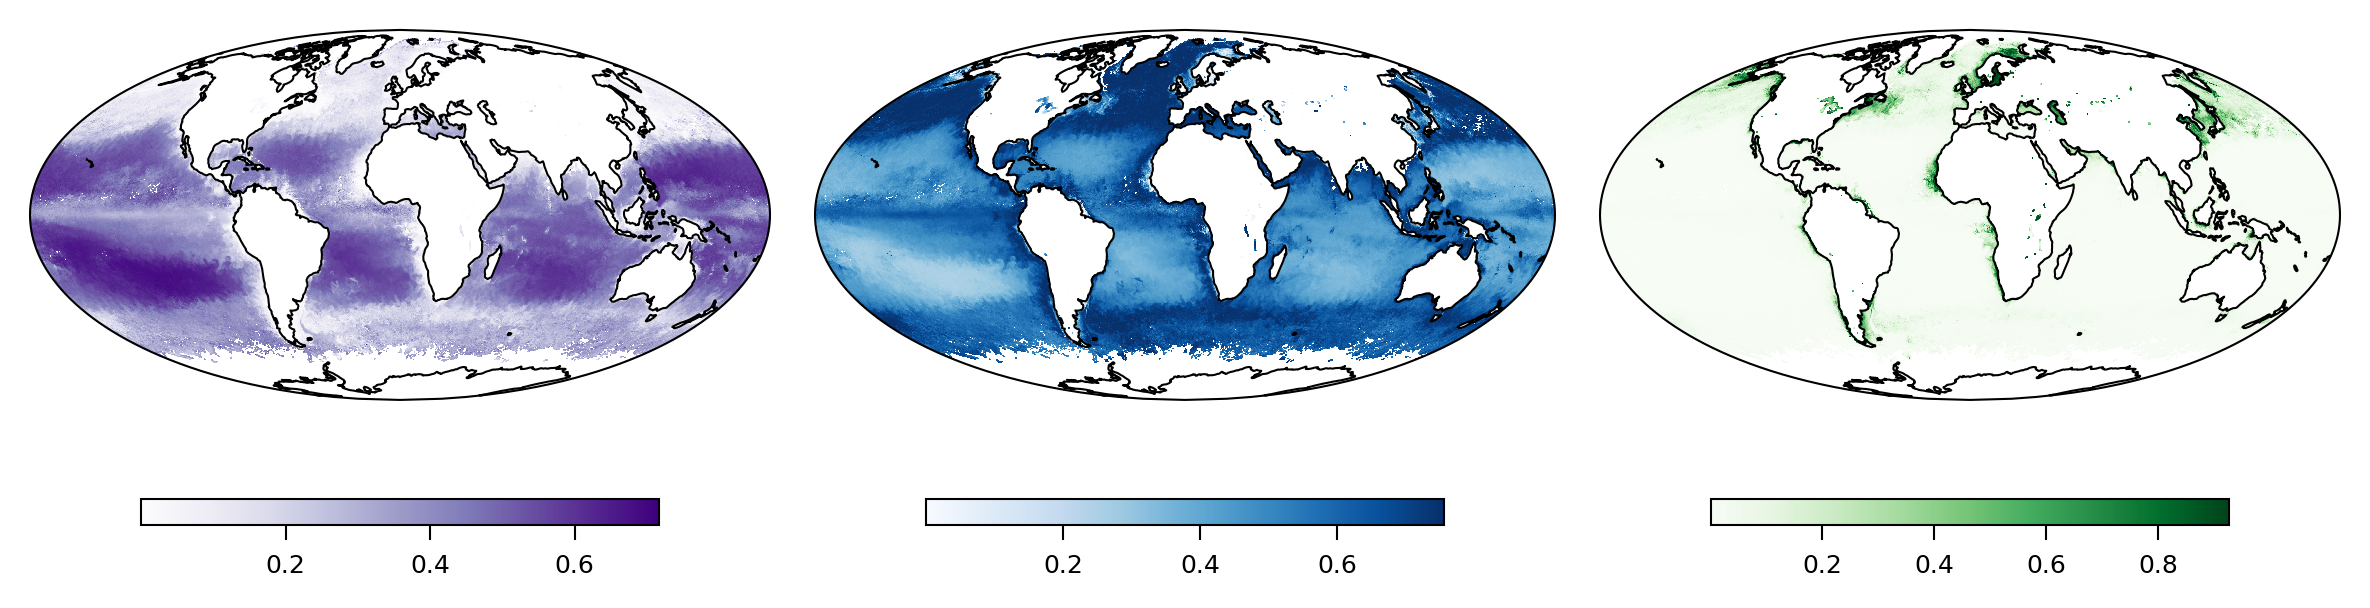

In [9]:
fig, ax = plt.subplots(1,3, figsize=(8,2.5), dpi=300, subplot_kw={'projection': ccrs.Mollweide()})

ax[0].coastlines(linewidth=.5)
ax[0].outline_patch.set_linewidth(0.5)
violet_niche_map = ax[0].pcolormesh(lon_rescaled, lat_rescaled, np.flip(violet_niche, 0), transform=ccrs.PlateCarree(), cmap='Purples')
cb = fig.colorbar(violet_niche_map, ax=ax[0], shrink=.7, orientation='horizontal')
cb.set_ticks(np.linspace(.2,.8,4))
cb.ax.tick_params(labelsize=6, width=.5)
cb.outline.set_linewidth(.5)

ax[1].coastlines(linewidth=.5)
ax[1].outline_patch.set_linewidth(0.5)
blue_niche_map = ax[1].pcolormesh(lon_rescaled, lat_rescaled,np.flip(blue_niche, 0), transform=ccrs.PlateCarree(), cmap='Blues')
cb = fig.colorbar(blue_niche_map, ax=ax[1], shrink=.7, orientation='horizontal')
cb.set_ticks(np.linspace(0,.8,5))
cb.ax.tick_params(labelsize=6, width=.5)
cb.outline.set_linewidth(.5)

ax[2].coastlines(linewidth=.5)
ax[2].outline_patch.set_linewidth(0.5)
green_niche_map = ax[2].pcolormesh(lon_rescaled, lat_rescaled, np.flip(green_niche, 0), transform=ccrs.PlateCarree(), cmap='Greens')
cb = fig.colorbar(green_niche_map, ax=ax[2], shrink=.7, orientation='horizontal')
cb.set_ticks(np.linspace(0,1,6))
cb.ax.tick_params(labelsize=6, width=.5)
cb.outline.set_linewidth(.5)

plt.tight_layout()
plt.show()

In [10]:
# subset maps
adg_443_east_coast = data.adg_443.isel(lat=slice(1200,1600),lon=slice(2100,2600), time=0)
adg_443_canada_lakes = data.adg_443.isel(lat=slice(800,1500),lon=slice(2000,2700), time=0)
adg_443_chesapeake_bay = data.adg_443.isel(lat=slice(1200,1350),lon=slice(2400,2600), time=0)

In [11]:
blue_niche = np.vectorize(blue_spl)(adg_443_chesapeake_bay)
green_niche = np.vectorize(green_spl)(adg_443_chesapeake_bay)
orange_niche = np.vectorize(orange_spl)(adg_443_chesapeake_bay)
red_niche = np.vectorize(red_spl)(adg_443_chesapeake_bay)

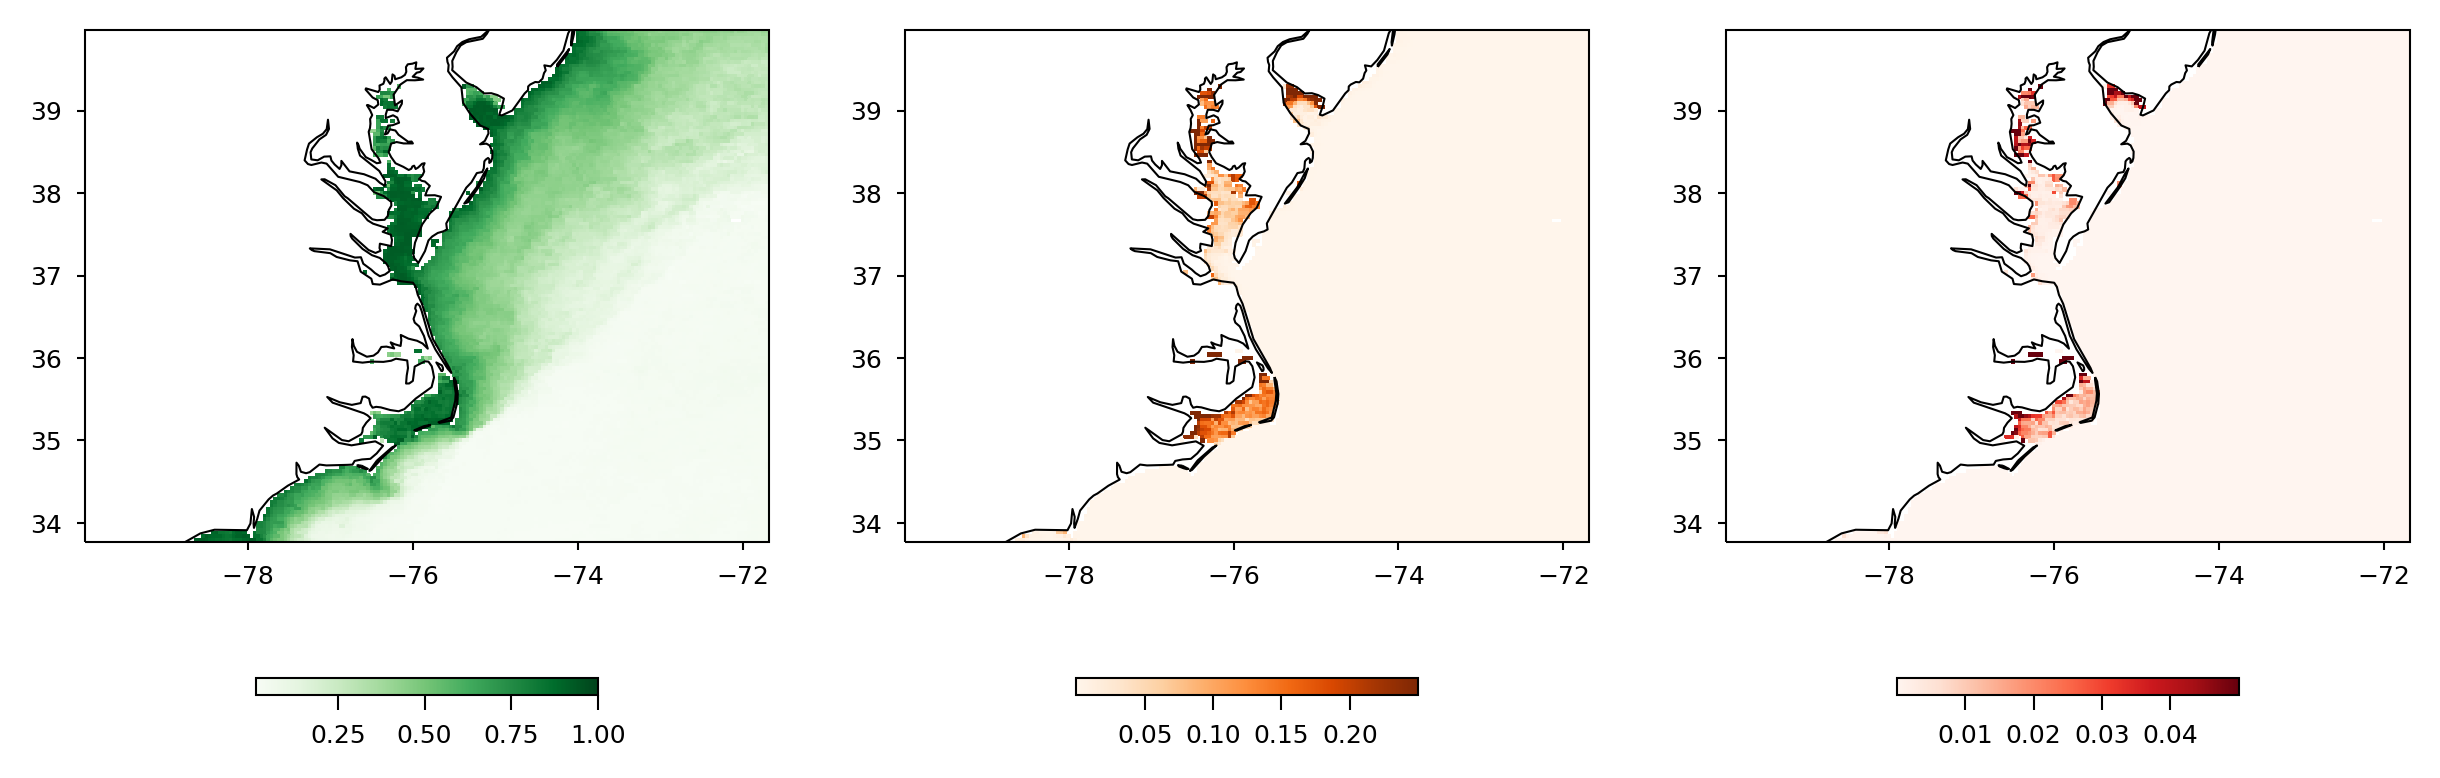

In [12]:
fig, ax = plt.subplots(1,3, figsize=(10,4), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})


green_niche_map = ax[0].pcolormesh(adg_443_chesapeake_bay.lon, adg_443_chesapeake_bay.lat,
                                   green_niche, transform=ccrs.PlateCarree(), vmax=1, cmap='Greens')

ax[0].coastlines(resolution='50m', linewidth=.5)
ax[0].outline_patch.set_linewidth(0.5)
cb = fig.colorbar(green_niche_map, ax=ax[0], shrink=.5, orientation='horizontal')
cb.ax.tick_params(labelsize=6, width=.5)
cb.outline.set_linewidth(.5)#cb.set_ticks(np.linspace(.05,.8,4))
ax[0].tick_params(labelsize=6, width=.5, length=2)
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_yticks(ax[0].get_yticks())
ax[0].autoscale(tight=True)

orange_niche_map = ax[1].pcolormesh(adg_443_chesapeake_bay.lon, adg_443_chesapeake_bay.lat,
                                    orange_niche, transform=ccrs.PlateCarree(), vmax=.25, cmap='Oranges')

ax[1].coastlines(resolution='50m', linewidth=.5)
ax[1].outline_patch.set_linewidth(0.5)
cb = fig.colorbar(orange_niche_map, ax=ax[1], shrink=.5, orientation='horizontal')
cb.ax.tick_params(labelsize=6, width=.5)
cb.outline.set_linewidth(.5)
cb.set_ticks(np.linspace(.05,.2,4))
ax[1].tick_params(labelsize=6, width=.5, length=2)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_yticks(ax[1].get_yticks())
ax[1].autoscale(tight=True)

red_niche_map = ax[2].pcolormesh(adg_443_chesapeake_bay.lon, adg_443_chesapeake_bay.lat,
                                 red_niche, transform=ccrs.PlateCarree(), vmax=.05, cmap='Reds')

ax[2].coastlines(resolution='50m', linewidth=.5)
ax[2].outline_patch.set_linewidth(0.5)
cb = fig.colorbar(red_niche_map, ax=ax[2], shrink=.5, orientation='horizontal')
cb.ax.tick_params(labelsize=6, width=.5)
cb.outline.set_linewidth(.5)
cb.set_ticks(np.linspace(.01,.04,4))
ax[2].tick_params(labelsize=6, width=.5, length=2)
ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_yticks(ax[2].get_yticks())
ax[2].autoscale(tight=True)